In [36]:
import pandas as pd
# from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
from keras.models import Sequential
from keras.layers import Dense #Y = Wx+b
from keras.layers import Flatten #converts multidimensional image to a vector
from keras.layers import Dropout
from keras.layers import Activation
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint #for saving models after certain epochs
from keras.optimizers import SGD, Adam, RMSprop

In [2]:
df = pd.read_csv("card_transdata.csv")

In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
#Dimension of the dataset
print(f"Dataset dimension: {df.shape}\n")
#Data types of the fields
print(f"Datatype: \n{df.dtypes}\n")
#Number of data records
print(f"Number of records: {df.shape[0]}")
print(f'Number of features: {df.shape[1] -1}')

Dataset dimension: (109970, 8)

Datatype: 
distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

Number of records: 109970
Number of features: 7


In [ ]:
df['fraud'].value_counts().reset_index()

,fraud,count
0,0.0,912597
1,1.0,87403


In [ ]:
(df[df['fraud'] == 1].shape[0])/(df[df['fraud'] ==0].shape[0])

0.09577392868922427

There are 87,403 fraudulent transactions and 912,597 non-fraudulent transactions in this dataset. Only 0.095% of the records are fraud

The dataset is highly im-balanced, sampling techniques is required.

## Exploratory Data Analysis

In [3]:
## Balancing the dataset using SMOTE
# smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)
y = df['fraud']
x = df.drop(columns='fraud')

In [4]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [5]:
xy_train = x_train.copy()
xy_train['fraud'] = y_train

In [8]:
xy_train.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

## Undersampling to balance the dataset

In [ ]:
y_train.describe()

,fraud
count,800000.000000
mean,0.087450
std,0.282494
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
y_train.shape

(800000,)

In [6]:
#Undersampling
x_res, y_res = rus.fit_resample(x_train, y_train)

In [7]:
xy_train_sampled = x_res.copy()
xy_train_sampled['fraud'] = y_res

In [11]:
xy_train_sampled['fraud'].value_counts()

,count
fraud,
0.0,69960
1.0,69960


In [12]:
print(xy_train_sampled['distance_from_home'].max())
print(xy_train_sampled['distance_from_home'].min())
print(xy_train_sampled['distance_from_home'].mean())

8777.136419511795
0.0225987966071393
44.51212696038077


In [13]:
xy_train_sampled['distance_from_home'].sort_values(ascending=False)

,distance_from_home
847723,8777.136420
174622,4394.314607
395167,3986.278366
546567,3695.070179
929335,3509.712374
...,...
510615,0.037825
179629,0.032026
78392,0.030511
888520,0.025847


In [ ]:
xy_train_sampled[xy_train_sampled['distance_from_home'] > 1000].shape

(185, 8)

#Visualizing the distribution of fraud and no fraud against the features

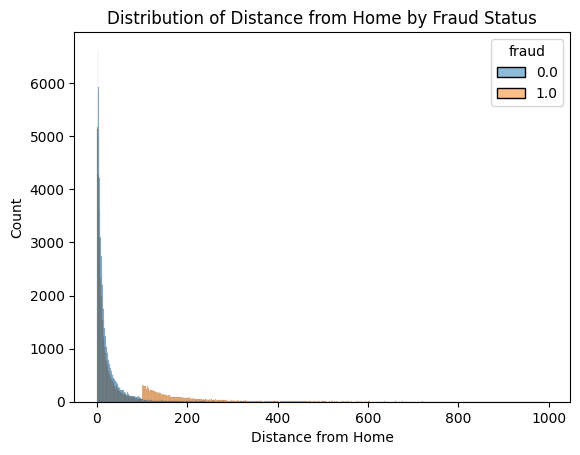

In [ ]:
#Distance from home
sns.histplot(data=xy_train_sampled[xy_train_sampled['distance_from_home'] <1000], x='distance_from_home', hue='fraud')
plt.title("Distribution of Distance from Home by Fraud Status")
plt.xlabel("Distance from Home")
plt.ylabel("Count")
plt.show()

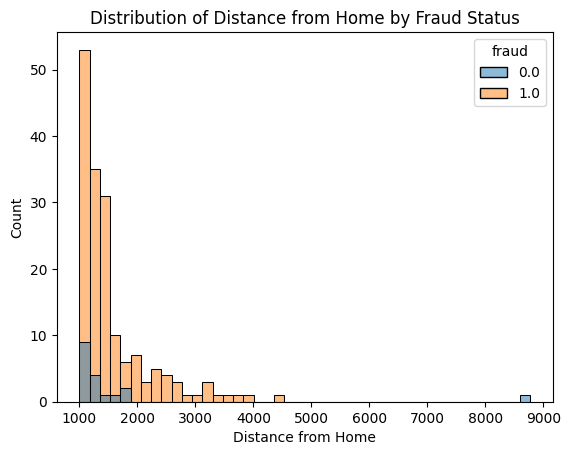

In [ ]:
#Distance from home
sns.histplot(data=xy_train_sampled[xy_train_sampled['distance_from_home'] >1000], x='distance_from_home', hue='fraud')
plt.title("Distribution of Distance from Home by Fraud Status")
plt.xlabel("Distance from Home")
plt.ylabel("Count")
plt.show()

In [ ]:
xy_train_sampled['distance_from_last_transaction'].describe()

,distance_from_last_transaction
count,139920.000000
mean,8.478532
std,36.506768
min,0.000407
25%,0.311281
50%,1.067363
75%,3.836370
max,2938.197853


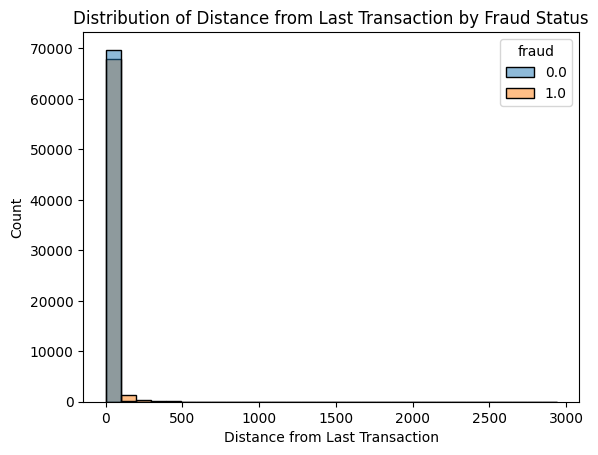

In [ ]:
#Distance from last transaction
sns.histplot(data=xy_train_sampled, x='distance_from_last_transaction', hue='fraud', bins=30)
plt.title("Distribution of Distance from Last Transaction by Fraud Status")
plt.xlabel("Distance from Last Transaction")
plt.ylabel("Count")
plt.show()

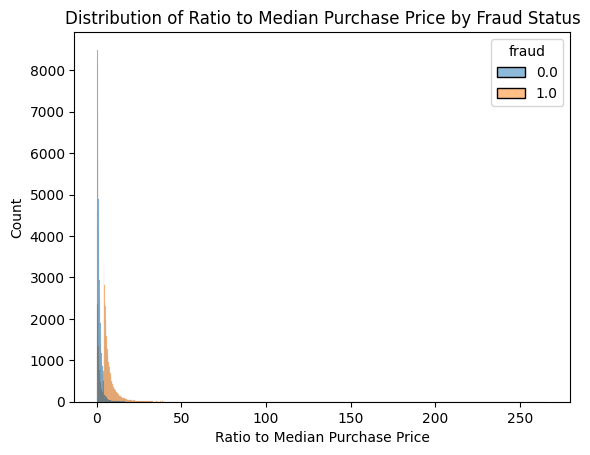

In [ ]:
#ratio to median purchase price
sns.histplot(data=xy_train_sampled, x='ratio_to_median_purchase_price', hue='fraud')
plt.title("Distribution of Ratio to Median Purchase Price by Fraud Status")
plt.xlabel("Ratio to Median Purchase Price")
plt.ylabel("Count")
plt.show()

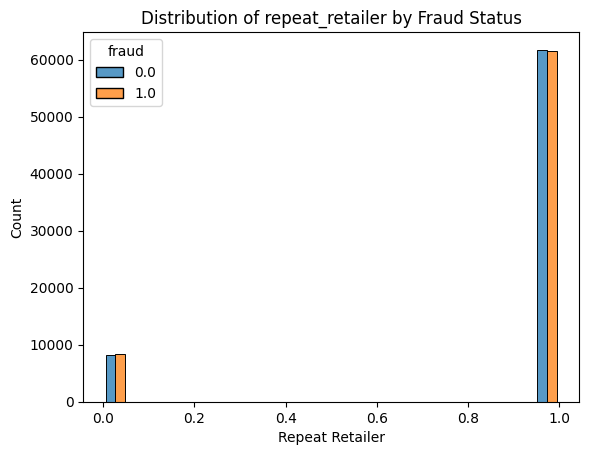

In [ ]:
#Repeat Retailer
sns.histplot(data=xy_train_sampled, x='repeat_retailer', hue='fraud', multiple='dodge', shrink=0.8)
plt.title("Distribution of repeat_retailer by Fraud Status")
plt.xlabel("Repeat Retailer")
plt.ylabel("Count")
plt.show()

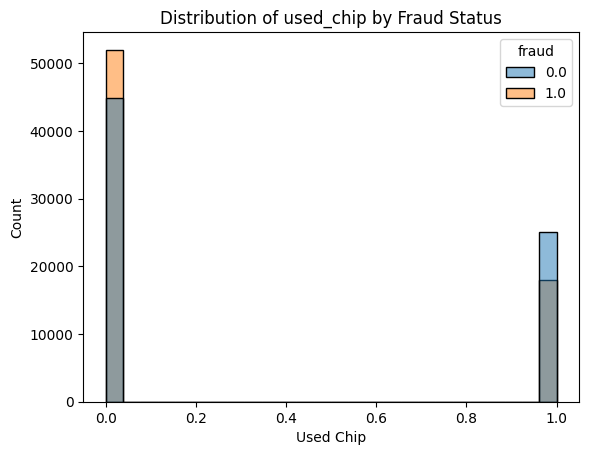

In [ ]:
#ratio to median purchase price
sns.histplot(data=xy_train_sampled, x='used_chip', hue='fraud')
plt.title("Distribution of used_chip by Fraud Status")
plt.xlabel("Used Chip")
plt.ylabel("Count")
plt.show()

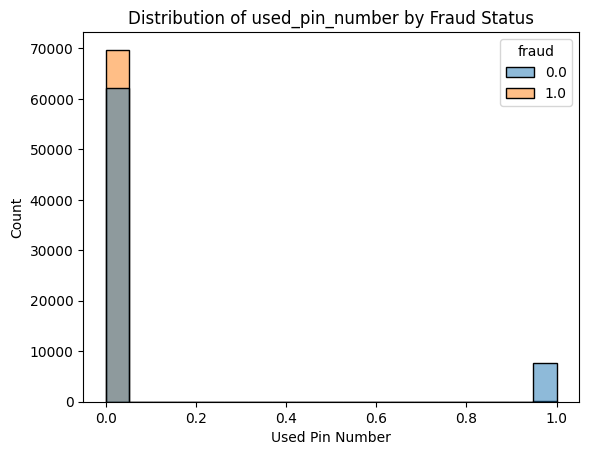

In [ ]:
sns.histplot(data=xy_train_sampled, x='used_pin_number', hue='fraud')
plt.title("Distribution of used_pin_number by Fraud Status")
plt.xlabel("Used Pin Number")
plt.ylabel("Count")
plt.show()

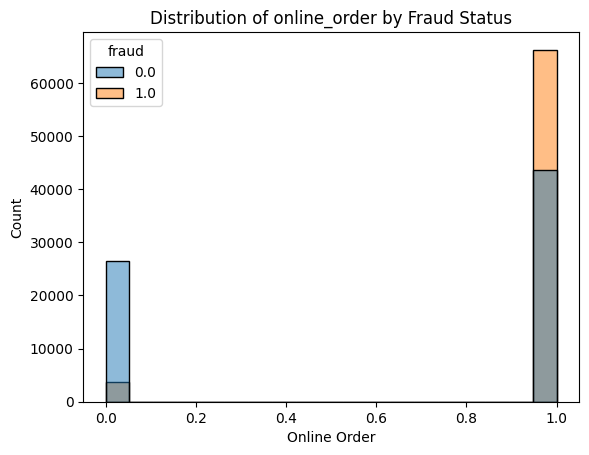

In [ ]:
sns.histplot(data=xy_train_sampled, x='online_order', hue='fraud')
plt.title("Distribution of online_order by Fraud Status")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show()

## Training the model

In [ ]:
# xy_train_sampled
# x_res - sampled data
# y_res - sampled data

In [8]:
#Normalization
scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(x_res)
x_test_scale = scaler.transform(x_test)

In [9]:
scaled_df = pd.DataFrame(x_train_scale, columns=x_res.columns, index=x_res.index)
scaled_df.shape
scaled_df['fraud'] = y_res

In [16]:
scaled_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
657781,0.004962,0.000560,0.005181,1.0,0.0,0.0,1.0,0.0
885136,0.000295,0.000333,0.001376,1.0,0.0,0.0,1.0,0.0
482720,0.005501,0.000284,0.021587,1.0,0.0,0.0,0.0,0.0
512549,0.001330,0.000018,0.001008,1.0,1.0,0.0,1.0,0.0
55314,0.000836,0.006083,0.000789,1.0,1.0,0.0,0.0,0.0


### Correlation Analysis

In [ ]:
# identifying the best features
corr = xy_train_sampled.corr()
corr.style.background_gradient(cmap='coolwarm')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.016571,-0.077484,0.153943,-0.105184,-0.035640,0.057525,0.210199
distance_from_last_transaction,-0.016571,1.000000,-0.038020,-0.015887,-0.037347,-0.019842,0.021754,0.115168
ratio_to_median_purchase_price,-0.077484,-0.038020,1.000000,-0.040144,0.034800,-0.089302,0.138799,0.479667
repeat_retailer,0.153943,-0.015887,-0.040144,1.000000,-0.004319,0.003606,0.072938,-0.003533
used_chip,-0.105184,-0.037347,0.034800,-0.004319,1.000000,0.012248,-0.025221,-0.110562
used_pin_number,-0.035640,-0.019842,-0.089302,0.003606,0.012248,1.000000,-0.077655,-0.232145
online_order,0.057525,0.021754,0.138799,0.072938,-0.025221,-0.077655,1.000000,0.394578
fraud,0.210199,0.115168,0.479667,-0.003533,-0.110562,-0.232145,0.394578,1.000000


In [ ]:
sorted_corr = corr['fraud'].abs().sort_values(ascending=False)
sorted_corr

,fraud
fraud,1.000000
ratio_to_median_purchase_price,0.479667
online_order,0.394578
used_pin_number,0.232145
distance_from_home,0.210199
distance_from_last_transaction,0.115168
used_chip,0.110562
repeat_retailer,0.003533


In [10]:
new_x_train = scaled_df.drop(columns='fraud')
new_y_train = scaled_df['fraud']

In [ ]:
print(new_x_train.shape)
print(new_y_train.shape)
print(x_test_scale.shape)
print(y_test.shape)

(139920, 7)
(139920,)
(200000, 7)
(200000,)


### Decision Tree

In [22]:
dt = DecisionTreeClassifier(random_state=1, criterion = 'entropy')
dt.fit(new_x_train, new_y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [23]:
print("testing accuracy: ", dt.score(x_test_scale, y_test))
print("training accuracy: ", dt.score(new_x_train, new_y_train))

testing accuracy:  0.999915
training accuracy:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
#Get an approximate depth for optimization
dt.get_depth()

7

In [25]:
#Tree depth optimization
#Create a validation set based on the training dataset
x_train1, x_val, y_train1, y_val = train_test_split(new_x_train, new_y_train, test_size = 0.2, random_state=1)

In [26]:
testing_score = [] #store the test data scores
training_score = [] #store the train data scores

#Optimizing the depth using the validation dataset.
for depth in range(1,8):
  dt = DecisionTreeClassifier(max_depth = depth, random_state=1)
  dt.fit(x_train1, y_train1)
  testing_score.append(dt.score(x_val, y_val)) #testing accuracy
  training_score.append(dt.score(x_train1, y_train1)) #training accuracy

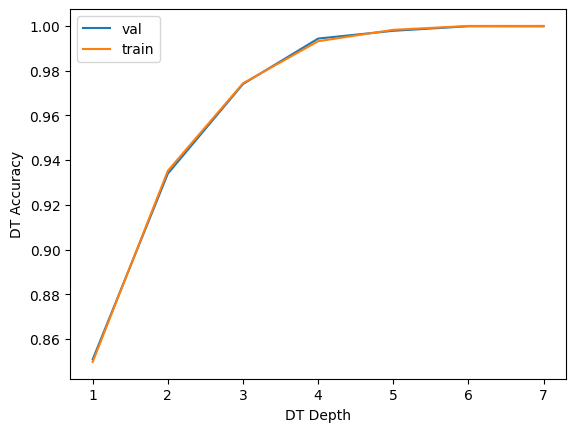

In [27]:
plt.plot(list(range(1,8)), testing_score)
plt.plot(list(range(1,8)), training_score)
plt.xlabel('DT Depth')
plt.ylabel('DT Accuracy')
plt.legend(['val', 'train'], loc='upper left')
plt.show()

In [26]:
# np.argmax(testing_score) #the index which maximizes the validation accuracy
# a = list(range(1,8))
# optimal_depth = a[np.argmax(testing_score)]
# print (f"Optimal tree depth: {a[np.argmax(testing_score)]}")

Optimal tree depth: 6


In [28]:
#Plotting DT with optimal depth overfit prevention
dt_optimal = DecisionTreeClassifier(max_depth = 4, random_state=1)
dt_optimal.fit(new_x_train, new_y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

Depth of tree: 4
Numer of leaves: 15


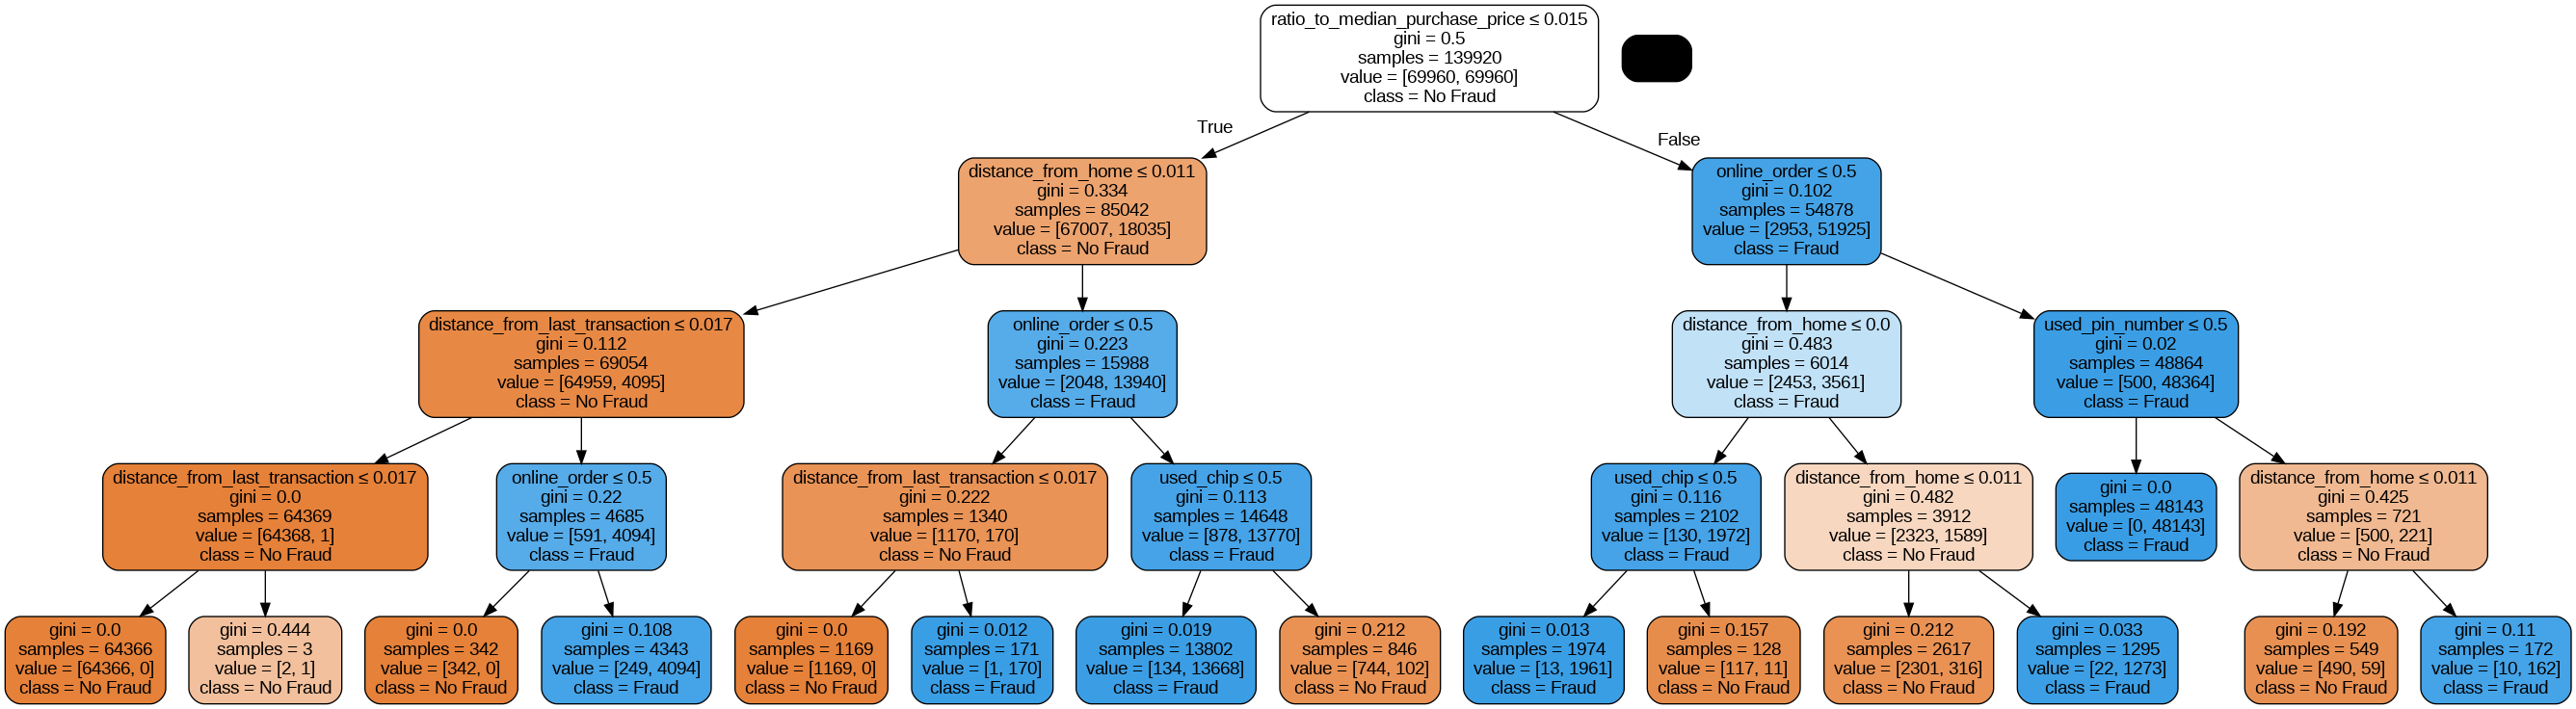

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

print(f"Depth of tree: {dt_optimal.get_depth()}")
print(f"Numer of leaves: {dt_optimal.get_n_leaves()}")

dot_data = StringIO()
export_graphviz(dt_optimal, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = list(new_x_train.columns),
                class_names=['No Fraud','Fraud'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('DT1.png')
Image(graph.create_png())

In [ ]:
print(new_x_train.shape)
print(new_y_train.shape)
print(x_test_scale.shape)
print(y_test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    182557
         1.0       0.94      0.99      0.96     17443

    accuracy                           0.99    200000
   macro avg       0.97      0.99      0.98    200000
weighted avg       0.99      0.99      0.99    200000



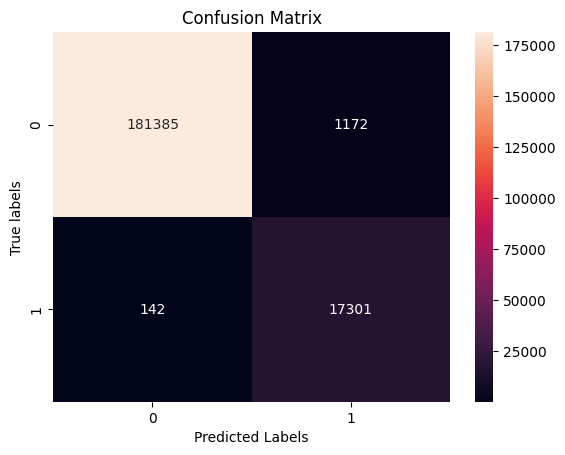

In [35]:
#Predicting the target values with the testing dataset
y_pred = dt_optimal.predict(x_test_scale)

#Plotting classification report and cm of actual value vs predicted value
cr1 = classification_report(y_test,y_pred)
cm1 = confusion_matrix(y_test, y_pred)
print (cr1)

ax= plt.subplot()

sns.heatmap(cm1, annot=True, ax=ax, fmt='d');
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

# ax.xaxis.set_ticklabels(["No Fraud","Fraud"]); ax.yaxis.set_ticklabels(["No Fraud","Fraud"]);

### Logistic regression

In [11]:
lr = LogisticRegression(random_state=1)
lr.fit(new_x_train, new_y_train)

LogisticRegression(random_state=1)

In [13]:
lr_pred = lr.predict(x_test_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
lr_pred

array([0., 1., 0., ..., 1., 0., 0.])

Accuracy: 0.912945
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95    182557
         1.0       0.50      0.94      0.65     17443

    accuracy                           0.91    200000
   macro avg       0.75      0.93      0.80    200000
weighted avg       0.95      0.91      0.92    200000



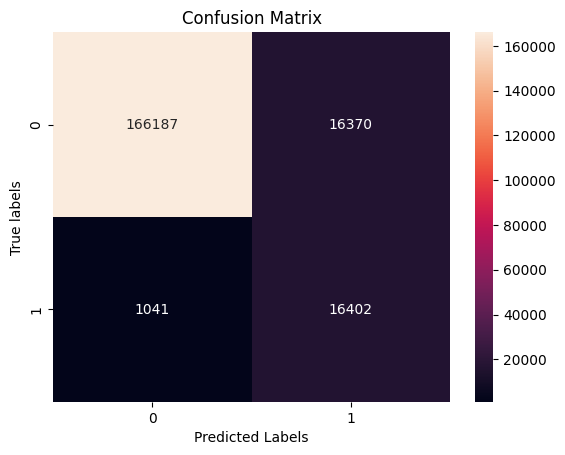

In [34]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, lr_pred))
cr2 = classification_report(y_test, lr_pred)
cm2 = confusion_matrix(y_test, lr_pred)
print (cr2)

ax2= plt.subplot()

sns.heatmap(cm2, annot=True, ax=ax2, fmt='d');
# labels, title and ticks
ax2.set_xlabel('Predicted Labels');ax2.set_ylabel('True labels');
ax2.set_title('Confusion Matrix');

### Naive Bayes

In [20]:
nb = GaussianNB()
nb.fit(new_x_train, new_y_train)
nb_pred = nb.predict(x_test_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Accuracy: 0.887375
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93    182557
         1.0       0.43      0.96      0.60     17443

    accuracy                           0.89    200000
   macro avg       0.72      0.92      0.77    200000
weighted avg       0.95      0.89      0.91    200000



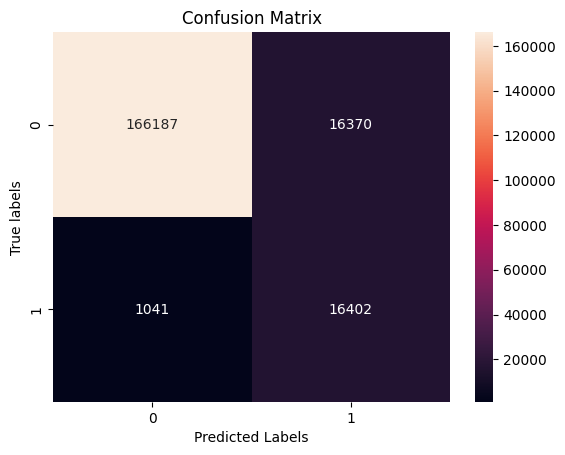

In [33]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, nb_pred))
cr3 = classification_report(y_test, nb_pred)
cm3 = confusion_matrix(y_test, nb_pred)
print (cr3)

ax3= plt.subplot()

sns.heatmap(cm2, annot=True, ax=ax3, fmt='d');
# labels, title and ticks
ax3.set_xlabel('Predicted Labels');ax3.set_ylabel('True labels');
ax3.set_title('Confusion Matrix');

### Simple Neural Network

In [37]:
nn = Sequential()

#Hidden layer1, 120 neurons
nn.add(Dense(120, input_dim=new_x_train.shape[1], activation='relu'))

#Hidden layer2, 60 neurons
nn.add(Dense(60, activation='relu'))
#Binary classification
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #Binary cross entropy for binary classification
print(nn.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           7,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,281 (32.35 KB)

 Trainable params: 8,281 (32.35 KB)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
checkpoint = ModelCheckpoint('NN_Fraud{epoch:02d}.keras')
epochs = 20

#Model training
history = nn.fit(new_x_train, new_y_train, validation_split=0.2, epochs=epochs, batch_size=32, callbacks =[checkpoint])

Epoch 1/20
3498/3498 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8353 - loss: 0.3447 - val_accuracy: 0.9813 - val_loss: 0.0537
Epoch 2/20
3498/3498 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9610 - loss: 0.0950 - val_accuracy: 0.9885 - val_loss: 0.0728
Epoch 3/20
3498/3498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9657 - loss: 0.0839 - val_accuracy: 0.9700 - val_loss: 0.1089
Epoch 4/20
3498/3498 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9673 - loss: 0.0815 - val_accuracy: 0.9654 - val_loss: 0.0970
Epoch 5/20
3498/3498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9704 - loss: 0.0756 - val_accuracy: 0.9908 - val_loss: 0.0514
Epoch 6/20
3498/3498 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9739 - loss: 0.0690 - val_accuracy: 0.9840 - val_loss: 0.0535
Epoch 7/20
3498/3498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9755 - loss: 0.0612 - val_accuracy: 0.9777 - val_loss: 0.0691
Epoch 8/20
3498/3498 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9789 - loss: 0.0539

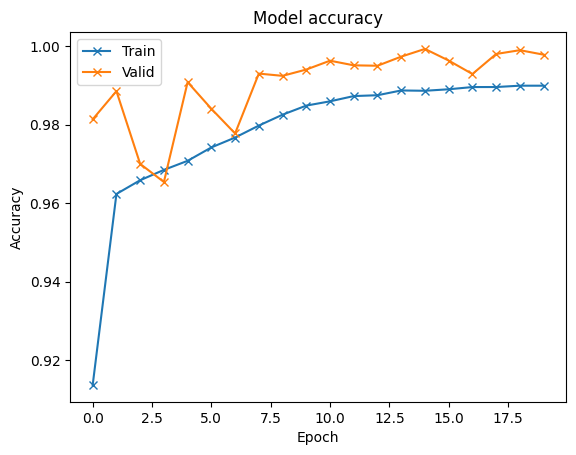

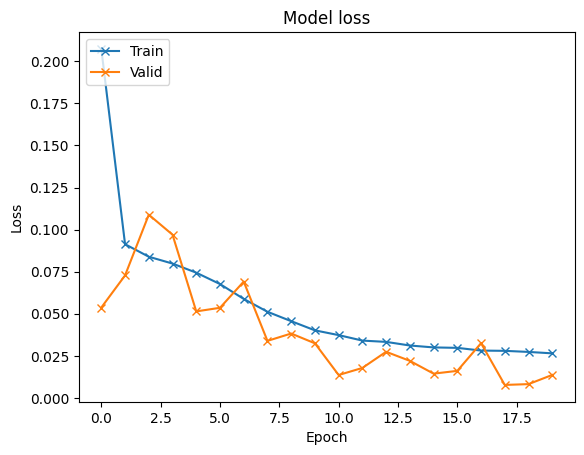

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'],'x-')
plt.plot(history.history['val_accuracy'],'x-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],'x-')
plt.plot(history.history['val_loss'],'x-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [46]:
from google.colab import files
files.download("NN_Fraud15.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
nn.load_weights("NN_Fraud15.keras")

In [50]:
scores=nn.evaluate(x_test_scale, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %4.f" % (scores[0]))

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9850 - loss: 0.0387
Accuracy: 98.53%
Loss:    0


In [52]:
nn_pred = nn.predict(x_test_scale)
nn_pred = np.round(nn_pred)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    182557
         1.0       0.86      1.00      0.92     17443

    accuracy                           0.99    200000
   macro avg       0.93      0.99      0.96    200000
weighted avg       0.99      0.99      0.99    200000



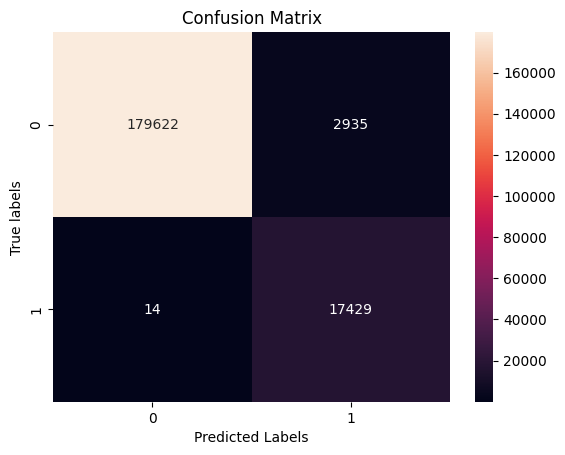

In [54]:
cr4 = classification_report(y_test, nn_pred)
cm4 = confusion_matrix(y_test, nn_pred)
print(cr4)

ax4= plt.subplot()
sns.heatmap(cm4, annot=True, fmt='d')
ax4.set_xlabel('Predicted Labels');ax4.set_ylabel('True labels');
ax4.set_title('Confusion Matrix');
plt.show()

### Optimizing NN